<img src="./img/logo_wiwi.png" width="23%" align="left">
<img src="./img/decision_analytics_logo.png" width="17%" align="right">

<br><br><br><br>


## Algorithmen und Datenstrukturen
Wintersemester 2025/26


# 8 Greedy-Heuristiken für schwierige Optimierungsprobleme


<br><br><br>
J-Prof. Dr. Michael Römer, Fynn Martin Gilbert

## Überblick

1. Einführung und Motivation: Ähnliche Probleme - unterschiedlich schwierig
2. Komplexität von Optimierungsproblemen
3. Greedy-Verfahren 
4. Weiteres Beispiel: Das Rucksack-Problem
5. Weiteres Beispiel: Das Stundenplan-Problem
6. Das Set Covering-Problem
7. Zusammenfassung

## Motivation: Ähnliche Probleme - unterschiedlich schwierig

### Die Suche nach einem kürzesten Weg zwischen zwei Knoten

- in allgemeinen Graphen mit Laufzeit $O(|N|^2 + |E|)$ (unsere Implementierung) bzw. $O(|N|log|N| + |E|)$ (effizientere Implementierung Dijkstra)
- in gerichteten azyklischen Graphen sogar nur $O(|N|+|E|)$

### Die Suche nach einem kürzesten Weg, *der alle Knoten beinhaltet*

- es ist **kein effizienter** Algorithmus bekannt
- genauer: es ist kein Algorithmus bekannt, der garantiert in polynmomieller Zeit einen solchen Weg findet

## Die Suche nach Wegen, die alle Knoten beinhalten: Problemvarianten

#### Shortest Hamiltonian Path Problem (SHPP)
- ein Weg, der alle Knoten genau einmal besucht, wird **Hamiltonscher Pfad** genannt
- das Problem, bei den man den den **kürzesten Hamiltonschen Pfad** sucht, nenn man das **Shortest Hamiltonian Path Problem (SHPP)**

#### Traveling Salesperson Problem (TSP)
- ein Weg, der alle Knoten genau einmal besucht und zum Ausgangspunkt zurückkehrt, wird **Hamiltonscher Zyklus** genannt
- das Problem der Suche nach dem **kürzesten Hamiltonschen Zyklus** nennt man **Traveling Salesperson Problem (TSP)**

##### Beachte: Ungenauigkeit / Fehler im Buch!
> In den Kapiteln 1 und 8 des Buches "Algorithmen kapieren" wird vom TSP gesprochen. In den Beispielen und Illustrationen wird jedoch das SHPP behandelt, da eine Rückkehr zum Ausgangsknoten nicht stattfindet

## SHPP: Ein Beispiel


<img src="./img/24.png" width="25%" align="right">

- wir suchen einen Hamiltonschen Pfad, der die Städte auf der rechten Seite miteinander verbindet
- dabei ist der Startort nicht vorgegeben - die Wahl des Startknotens ist Teil der Fragestellung


- beispielhafte Pfade sehen so aus:

<img src="./img/25.png" width="40%" align="middle">

## SHPP: Eigenschaften

<img src="./img/26.png" width="35%" align="right">

- bei SHPP- und TSP-Problemen gibt es 
  - symmetrische Probleme (Distanz von A nach B = Distanz von B nach A) und
  - asymmetrische Probleme (Distanz von A nach B $\neq$ Distanz von B nach A)
 

-  gehen wir von einem asymmetrischen Problem aus, so gibt es bei 2 Knoten beim SHPP zwei Lösungen 
    
><div class="alert alert-block alert-info">
<b> Wie viele gäbe es beim TSP? </b></div>

    

## SHPP: Anzahl an Lösungen: 3 Städte

<img src="./img/27.png" width="30%" align="right">

- nehmen wir an, wir haben drei Städte - wie viele Lösungen für das SHPP gibt es?
- für jede einzelne Stadt gibt zwei verschiedene Lösungen:

- jede Stadt kann Start-Stadt sein, also gibt es 3 $\cdot$ 2 = 6 Lösungen

<img src="./img/28_flat.png" width="100%" align="middle">

## SHPP: Anzahl an Lösungen: 4 Städte

<img src="./img/29.png" width="40%" align="right">

- wie viele Lösungen gibt es für 4 Städte?
- für jede einzelne Stadt gibt es 6 verschiedene Lösungen:

- jede Stadt kann Start-Stadt sein, also gibt es 4 $\cdot$ 6 = 24 Lösungen

<img src="./img/30.png" width="50%" align="middle">

## SHPP: Anzahl an Lösungen: Allgemeiner Fall

Erkennen Sie eine Struktur?

<img src="./img/31.png" width="80%" align="middle">

- tatsächlich gibt es für $n$ Städte $n$ mal soviele Lösungen wir für $n-1$ Städte
- das entspricht der so genannten Fakultätsfunktion $n!$

.. wie wir wissen, steigt die sehr schnell an (sogar schneller als exponentiell):

In [3]:
from math import factorial
factorial(50)

30414093201713378043612608166064768844377641568960512000000000000

## SHPP: Enumerationsverfahren und Komplexität des Problems

- den Algorithmus, der derauf beruht, alle Lösungen durchzugehen und die beste zu wählen, nennt man **vollständige Enumeration**
- in der Regel ist dies jedoch nicht der beste Algorithmus für ein Problem...



#### Beachte daher:
- die reine Anzahl aller zulässigen Lösungen macht noch keine Aussage über die Komplexität eines Problems!
- es gibt Probleme mit einer exponentiell großen oder sogar unendlichen Zahl an möglichen Lösungen, die einfach lösbar sind!


#### Dennoch:
- für das SHPP und das TSP sind zwar bessere Verfahren als die vollständige Enumeration,
  - jedoch keine "wirklich" effizienten Verfahren!
- die beste bekannte Worst-Case-Laufzeit ist $O(|N|^2 \cdot 2^{|N|})$

# 2. Komplexität von Optimierungsproblemen

## Komplexitätsklassen

Bisher haben wir meist "leichte" Probleme betrachtet, d.h. Probleme, für die Algorithmen bekannt sind, deren worst-case Laufzeit als Polynom der Eingabegrößen dargestellt werden kann.
- derartige Probleme liegen in der **Komplexitätsklasse P** 

Für "schwere" Probleme gilt (etwas vereinfacht gesagt): Es gibt keinen bekannten Algorithmus mit einer Laufzeit die schneller ist als exponentiell
- Beispiele: TSP, SHPP, ...

Derartige Probleme gehören zur Komplexitätsklasse der **NP-schweren** Probleme

##### Beachte:
Im Buch wird davon gesprochen, dass das TSP und das Minimum Set Covering Problem "NP-vollständigen" Probleme sind: Das ist nicht (ganz) korrekt: Es sind **NP-schwere** (NP hard) Probleme

..siehe auch: https://eklitzke.org/the-traveling-salesman-problem-is-not-np-complete

## Ein weiteres Paar nur scheinbar ähnlicher Probleme:

### Lineare Programmierung (mit kontinuierlichen Variablen)
- die wir aus Grundlagen des OR kennen
- ...ist in polynomieller Zeit lösbar in Komplexitätsklasse P
- "fun fact": der Simplex-Algorithmus hat eine exponentielle Worst-Case-Laufzeit
- so genannte Interior-Point-Verfahren haben eine polynomielle Laufzeit

### Ganzzahlige Lineare Programmierung
- kennen wir ebenfalls aus GOR?
- ist NP-schwer!


## NP-schwere Probleme in der Praxis

- obwohl NP-schwere Probleme (theoretisch) eine exponentielle Laufzeit aufweisen, 
- können manche (aber bei weitem nicht alle!) Praxisprobleme, die NP-schwer sind, trotzdem in praktisch annehmbarer Zeit gelöst werden
  - beachte: die praktisch annehmbare Zeit hängt vom Problem ab - manchmal braucht man eine Lösung in Sekunden,  manchmal hat man eine ganze Nacht oder sogar mehrere Tage lang Zeit
- "theoretically intractable, but practically tractable"


#### Beispiele:
- TSPs mit 1000 Städten können auf dem iPhone gelöst werden: https://apps.apple.com/us/app/concorde-tsp/id498366515
- noch wichtiger: (gemischt-)ganzzahlige Optimierung
  - einerseits gibt es viele Praxisprobleme, deren Modellinstanzen relativ klein sind (< 100 000 Variablen)
  - andererseits können (viele, aber bei weitem nicht alle) riesige ganzzahlige Optimierungsprobleme mit mehreren hunderttausenden Variablen heute effizient auf Notebooks gelöst werden
- außerdem gibt es natürlich auch noch viel bessere Heuristiken als reine Greedy-Verfahren!

## Anmerkung: P vs NP

Das vielleicht wichtigste offene Problem der theoretischen Informatik ist das **P vs NP-Problem**:

Obwohl die meisten Forschenden annehmen, dass P $\neq$ NP ist, ist dies bisher nicht bewiesen worden!


Bsp: Wenn P=NP gelten würde, so müsste ein polynomieller Algorithmus für das TSP existieren...


### Komplexitätstheorie:
- hiermit endet für uns schon unser kleiner Ausflug in die Komplexitätstheorie
- eine weitere Vertiefung würde für uns zu weit führen!

# 3. Greedy-Verfahren 

## Was tun, wenn kein effizienter Algorithmus bekannt ist?

- für das SHPP und das TSP sind keine effizienten Algorithmen bekannt
- was kann man tun, wenn man dennoch ein großes TSP, z.B. mit 10000 Städten lösen möchte?

#### Idee: Man gibt die Optimalitätsforderung auf!

Wenn man es nicht schafft, in kurzer Zeit eine exakte / optimale Lösung zu finden,
- kann man versuchen, in kurzer Zeit eine **gute** Lösung zu finden!
- Verfahren, die das für Optimierungsprobleme versuchen, nennt man **Heuristiken**
- ein besonders einfacher und allgemeiner Ansatz nennt sich **Greedy-Verfahren** (greedy = gierig)
 - diesen Ansatz werden wir nun näher betrachten

## Ein Greedy-Ansatz für das Shortest Hamiltonian Path-Problem: Nearest-Neighbor

<img src="./img/32.png" width="20%" align="right">


Eine einfache und sehr bekannte Heuristik für das SHPP (und das TSP) nennt sich **nearest neighbor**:
- man startet bei einem Knoten und
- wählt in jedem Schritt immer den Knoten aus, der dem aktuellen am nächsten ist:

Beispiel rechts: wir starten in Marin und suchen immer den nächsten Nachbarn

><div class="alert alert-block alert-info">
<b> Welche Laufzeitkomplexität weist dieser Algorithmus auf? </b></div>

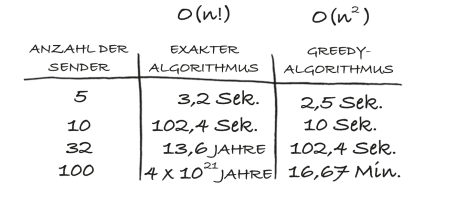

### Mehr zum TSP

<img src="https://pup-assets.imgix.net/onix/images/9780691163529.jpg" width="20%" align="right">

- das TSP ist eines der bekanntesten Probleme der Informatik
- viele Ideen in der  kombinatorische Optimierung, wurden zuerst für das TSP entwickelt
- **Buchtipp:**  [In Pursuit of the Traveling Salesman](https://press.princeton.edu/books/paperback/9780691163529/in-pursuit-of-the-traveling-salesman)
 - die Geschichte des TSP aus Sicht eines der Protagonisten (William Cook)
- Webseite zum TSP: https://www.math.uwaterloo.ca/tsp/index.html
- TSP-Algorithmen selbst ausprobieren: https://www.math.uwaterloo.ca/tsp/app/diy.html


## Vereinfachte Definition: Greedy-Algorithmus

#### Kernidee von Greedy-Algorithmen
- der Algorithmus geht Schritt für Schritt vor
- die Auswahl des nächsten Schritts / der nächsten Aktion erfolgt "gierig", d.h.
  - es wird ein (lokales) Kriterium definiert (z.B. Entfernung zu den Nachbarn) und
  - eine "lokal optimale"  Aktion (ein lokal optimaler nächster Schritt) gewählt (z.B. der Nachbar mit der niedrigsten Entfernung)

#### Beachte: 
Die "lokal optimale" Auswahl ist in der Regel nicht "global optimal"

><div class="alert alert-block alert-info">
<b> Wieso trifft diese Aussage beim SHPP und mehr noch beim TSP zu? </b></div>

><div class="alert alert-block alert-info">
<b> Ist Dijkstra ein Greedy-Algorithmus? </b></div>

# 4. Weiteres Beispiel: Das Rucksack-Problem

## Das Rucksack-Problem (Knapsack Problem)

Ein weiteres bekanntes Problem, das einfach zu verstehen, aber (für große Instanzen) schwer zu lösen ist, ist das

#### Rucksack-Problem (Knapsack Problem)

- Gegeben ist ein Rucksack, der ein **Maximalgewicht** fassen kann,
- sowie Gegenstände, die eingepackt werden können. Diese haben jeweils
  - ein Gewicht und
  - einen Wert
- das Ziel ist es, eine Menge von Gegenständen einzupacken, 
  - die das Maximalgewicht nicht überschreitet und
  - einen möglichst großen Wert hat
  

Wie das TSP ist dieses Optimierungsproblem NP-schwer!

><div class="alert alert-block alert-info">
<b> Wie könnte ein Greedy-Algorithmus für dieses Problem funktionieren? </b></div>

## Das Rucksack-Problem: Beispiel

<img src="./img/07.png" width="20%" align="right">

Nehmen wir an, du bist ein habgieriger Dieb. Du kannst in deiner Tasche maximal 35 Pfund transportieren und dich interessieren folgende drei Gegenstände:



<img src="./img/08.png" width="40%" align="left ">

Was passiert, wenn wir als Greedy-Regel immer den wertvollsten noch passenden Gegenstand in den Rucksack packen?

### Rucksack-Beispiel: Greedy-Lösung vs Optimale Lösung

Die Lösung mit dem genannten Greedy-Ansatz sieht wie folgt aus:

<img src="./img/09.png" width="40%" align="middle">

Es ist leicht zu sehen, dass die optimale Lösung anders aussieht:
<img src="./img/10.png" width="20%" align="middle">

><div class="alert alert-block alert-info">
<b> Wie könnte ein alternativer Greedy-Algorithmus aussehen? </b></div>

# 4. Weiteres Beispiel: Ein Stundenplanungsproblem

## Ein Stundenplanungsproblem

<img src="./img/01.png" width="20%" align="right">

- nehmen wir an, du bist Lehrer und du würdest gern möglichst viele Stunden unterrichten 
- möglich wären folgende Stunden:

..du kannst allerdings nicht alle unterrichten, denn die Stunden überlappen sich:

<img src="./img/02.png" width="40%" align="middle">

><div class="alert alert-block alert-info">
<b> Wie könnte ein Greedy-Algorithmus für dieses Problem funktionieren? </b></div>

## Ein Greedy-Algorithmus

<img src="./img/03.png" width="30%" align="right">

#### Möglicher Greedy-Ansatz
- beginnend der frühesten Stunde: 
- füge jeweils die früheste noch passende  Stunde hinzu
- Schritt 1: wir fangen mit Kunst an

### Schritt 2:

<img src="./img/04.png" width="20%" align="right">

- Englisch passt nicht wegen Überlappung..
- Mathe schon!

### Schritt 3:

<img src="./img/05.png" width="20%" align="right">

- Informatik passt nicht wegen Überlappung..
- Musik schon!

## Stundenplan-Beispiel

..fertig ist der Stundenplan:

<img src="./img/06.png" width="40%" align="middle">


... tatsächlich ist dies die optimale Lösung!


><div class="alert alert-block alert-info">
<b> Ist das ein Zufall? Woran liegt es, dass die Lösung optimal ist? Würde das immer der Fall sein, und welche Bedingungen müssen dafür gelten? </b></div>


#### Beachte:

Echte Stundenplanungsprobleme mit 
- mehreren Lehrern
- mehreren Klassen
- und Raumzuordnungen

...sind NP-schwere Probleme, für das Greedy-Verfahren in der Regel schlechte Lösungen bringen!

# Beispiel: Das Set Covering-Problem 

# Beispiel: Das Set Covering-Problem (Mengenüberdeckungsproblem)

Im **Set-Covering-Problem** (deutsch: **Mengenüberdeckungsproblem**) geht es darum,
- alle Elemente einer Gesamtmenge zu überdecken mit "Konstrukten", die jeweils eine Teilmenge abdecken
- wenn es um Set Covering als Optimierungsproblem geht, sucht man eine optimale (z.B. kostenminimale) Abdeckung


#### Beispiele:
- Crew Scheduling: "Abdeckung" aller Flüge in einem Flugplan mit Dienstplänen für geeignetes Personal
- Umlaufplanung für Busse: Abdeckung aller Fahrten in einem Busfahrplan mit Umläufen für jedes Fahrzeug
- Abdeckung einer Region mit Mobilfunknetzen durch Positionierung von Funkmasten
- ...

#### Beachte:
Ein verwandtes Problem ist das so genannte **Set Partitioning**-Problem:
- während beim Set Covering-Problem Mehrfachabdeckung erlaubt ist, ist das beim Set Partitioning nicht der Fall

## Set Covering-Anwendung: Auswahl von Radiosendern für deine Sendung

<img src="./img/11.png" width="20%" align="right">

- du produzierst eine Radiosendung und möchtest diese in allen US-Bundesstaaten ausstrahlen
- die Ausstrahlung erfolgt über Radiosender
  - jeder Sender wird in bestimmten Sendegebieten (u.U. mehrere Staaten) ausgestrahlt
  - die Sendegebiete können sich dabei überlappen
- $\rightarrow$ Du möchtest die **kleinste Menge an Sendern** ermitteln, die **alle 50 Staaten abdecken**!



<img src="./img/12.png" width="20%" align="left"> 

<img src="./img/13.png" width="20%" align="right">




## Set Covering-Beispiel Radio: Welche Lösungen gibt es?

- wir könnten versuchen, alle möglichen Lösungen zu ermitteln / **zu enumerieren**:

<img src="./img/14.png" width="35%" align="middle">

<img src="./img/15.png" width="19%" align="right">

- das würde bedeuten, **alle möglichen Kombinationen von Sendern** zu bilden
  - also die Potenzmenge (power set) der Menge der Sender
- ...und dann eine zu wählen, die 
  - alle Staaten abdeckt und
  - eine minimale Anzahl von Sendern beinhaltet
- es gibt $2^n$ Kombinationen - siehe rechts

 ..eine vollständige Enumeration hätte also eine Laufzeit von $O(2^n)$ - dies ist kein praktikabler Ansatz!

## Set Covering  - ein Greedy-Ansatz?

><div class="alert alert-block alert-info">
<b> Wie könnte ein Greedy-Ansatz für das Set Covering-Problem aussehen? </b></div>

><div class="alert alert-block alert-info">
<b> Welche Datenstrukturen spielen hier eine besondere Rolle? </b></div>

## Ein Greedy-Ansatz für das Set Covering-Problem: Skizze

#### Skizze des Algorithmus

Solange noch nicht alle Elemente (Staaten) abgedeckt sind:
- ermittle das Konstrukt (den Radiosender), das die meisten noch  unabgedeckten Elemente (Staaten) aufweist
- füge dieses Konstrukt (diesen Radiosender) zur Lösung (zur Liste der Radiosender) hinzu

><div class="alert alert-block alert-info">
<b> Wie ist die Laufzeitkomplexität dieses Ansatzes? </b></div>

<img src="./img/22.png" width="40%" align="middle">


><div class="alert alert-block alert-info">
<b> Wie können wir auf einfache Art und Weise die unabgedeckten Elemente ermitteln? </b></div>

## Die Datenstruktur `set`

<img src="./img/18.png" width="20%" align="right">
<img src="./img/19.png" width="20%" align="right">

..haben wir bereits mehrfach genutzt!
- sie bildet das mathematische Konstrukt einer Menge ab
- insbesondere kann jedes Element nur einmal vorkommen
- Erstellung aus einer Liste von Elementen:



In [1]:
obstsorten = set(["Apfel", "Banane", "Tomate"])
gemuesesorten = set(["Karotte","Rübe","Tomate"])

- die Abfrage, ob ein Element vorhanden ist, erfolgt in $O(1)$
- die Anzahl (Kardinalität) an Elementen einer Menge ebenfalls

In [2]:
print("Apfel" in obstsorten)
len(obstsorten)

True


3


## Die Datenstruktur `set`

<img src="./img/20.png" width="40%" align="right">

- es werden die klassischen Mengenoperationen unterstützt
  - Schnittmenge
  - Vereingungsmenge
  - Differenz

In [3]:
print ( obstsorten | gemuesesorten )
print ( obstsorten & gemuesesorten )
print ( obstsorten - gemuesesorten )



{'Tomate', 'Karotte', 'Rübe', 'Apfel', 'Banane'}
{'Tomate'}
{'Apfel', 'Banane'}


## Eine etwas genauere Beschreibung des Greedy-Algorithmus

- die verwendeten Variablennamen  beziehen sich auf das Beispiel, der Algorithums selbst ist jedoch allgemein

#### Gegeben: 
- eine Hash-Tabelle (`dict`) `stations` mit:
  - **Schlüssel:** Name der Radio-Station
  - **Wert:** Menge (`set`) der Staaten, die die Station abdeckt
- eine Liste `states` aller zu überdeckenden Staaten 


#### Initialisiere:
- die Menge (`set`)  `states_needed` der noch nicht überdeckten Staaten 
- die Liste `stations_selected` der ausgewählten Stationen


**Solange** noch nicht alle Staaten überdeckt wurden:
- Für jeden Sender `stations`, der nicht in `stations_selected` ist
  - berechne die neu gecoverten Staaten als Schnittmenge aus `states_needed` und den vom Sender überdeckten Staaten
  - wenn die  Anzahl der neu gecoverten Staaten größer ist als die des bisher besten Senders:
    - aktualisiere den bisher besten Sender
- füge den besten Sender zu `stations_selected`hinzu
    

## Implementierung in Python: Gegebene Daten



In [8]:
states = ["mt", "wa", "or", "id", "nv", "ut", "ca", "az"]

stations = {}
stations["reins"] = set(["id", "nv", "ut"])
stations["rzwei"] = set(["wa", "id", "mt"])
stations["rdrei"] = set(["or", "nv", "ca"])
stations["rvier"] = set(["nv", "ut"])
stations["rfünf"] = set(["ca", "az"])


<img src="./img/17.png" width="25%" align="right">
...schauen wir uns doch mal diese Mengen an:
<div class="alert alert-block alert-info">
<b> Was können wir jetzt schon über die Lösung sagen? </b></div>

## Implementierung in Python

In [7]:
def greedy_set_cover(states, stations):
    # initialisierung
    states_needed = set(states) # die Staaten, die noch abzudecken sind   
    selected_stations = [] # die bisher gewählten Stationen

    while len(states_needed) > 0: # solange es Stationen gibt, die noch nicht gewählt wurden
        # initialisiere die Variablen für jeden "äußeren" Schritt 
        best_station = None # die beste Station (diejenige, die die meisten noch nicht abgedeckten Staaten überdeckt)
        best_number_covered = 0 # die entsprechende beste Zahl an Staaten
        best_covered_needed_states = None # die beste Menge der hinzukommenden Staaten (bisher noch nicht abgedeckt)
        
        for station, covered in stations.items(): # iteration über das dict (.items() bedeutet: gib sowohl key als auch value zurück)
            
            covered_needed_states = covered & states_needed # Schnittmenge aus noch nicht überdeckten und von dieser Station überdeckten Stationen
            number_covered = len(covered_needed_states) # Anzahl der von dieser Station "neu" überdeckten Staaten
            
            if number_covered > best_number_covered: # wenn diese Anzahl > ist als die bisher größte, aktualisiere 
                best_number_covered = number_covered # neue beste Anzahl
                best_station = station # neue beste Station
                best_covered_needed_states = covered_needed_states # neue Menge an hinzukommenden Staaten
        # Ende der inneren Schleife
        print("Selected Station:", best_station, "covered needed states ", best_covered_needed_states)  
        selected_stations.append(best_station) # füge die Station zur Liste der ausgewählten hinzu        
        states_needed -= best_covered_needed_states # Aktualisiere die Menge noch nicht überdeckten Staaten (rausnehmen der hinzugekommenen()
        
        print ("States remaining to cover", states_needed)
    # Ende der äußeren Schleife   
    
    return selected_stations # Rückgabe der Lösung       

- Ausprobieren am Beispiel:

In [9]:
greedy_set_cover(states, stations)

Selected Station: reins covered needed states  {'id', 'nv', 'ut'}
States remaining to cover {'or', 'wa', 'ca', 'mt', 'az'}
Selected Station: rzwei covered needed states  {'mt', 'wa'}
States remaining to cover {'or', 'ca', 'az'}
Selected Station: rdrei covered needed states  {'or', 'ca'}
States remaining to cover {'az'}
Selected Station: rfünf covered needed states  {'az'}
States remaining to cover set()


['reins', 'rzwei', 'rdrei', 'rfünf']

## Zusammenfassung

- während für manche Probleme effiziente Algorithmen bekannt sind (z.B. Sortierprobleme, Kürzeste Wege, Lineare Programmierung), sind für andere Probleme (z.B. TSP, gemischt-ganzzahlige Optimierung) nur Algorithmen bekannt, die eine **exponentielle** Laufzeit aufweisen
- generell spricht man bei solchen Problemen von **kombinatorischen Optimierungsproblemen**, die zur Komplexitätsklasse der **NP-schweren** Probleme gehören

- es gibt zwar für manche NP-schwere Probleme Algorithmen, die bestimmte praktische Probleme in annehmbarer Zeit lösen können, 
- dennoch ist es oftmals nötig, auf **Heuristiken** zurückzugreifen, die schnell (hoffentlich) gute Lösungen liefern
- eine einfache Klasse derartiger Verfahren sind so genannte **Greedy-Algorithmen**, die in jedem Schritt "lokal optimale" Entscheidungen treffen
- wir haben einige Beispiele betrachtet:
  - Wegeprobleme, bei denen jeder Knoten besucht werden muss (TSP und SHPP)
  - das Rucksackproblem
  - das (minimum) Set Covering Problem

### Beim nächsten Mal:  Dynamische Programmierung
- eine wichtiges Konstruktionsprinzip für effiziente Algorithmen
- die Basis für viele moderne Ansätze wie z.B. Reinforcement Learning


# Anmerkungen zu Kapitel 8 des Buches

## Approximationsalgorithmus vs Heuristik
- Im Buch wird der Begriff "Approximationsalgorithmus" verwendet, um Verfahren zu beschreiben, die (hoffentlich) ein gute, aber nicht immmer eine optimale Lösung finden. Korrekt ist hierfür allerdings die Bezeichnung "Heurisitik" 
- Unter einem "Approximationsalgorithmus" verstehen wir einen Algorithmus, der uns eine **Qualitätsgarantie** gibt, z.B. : "Die Lösung ist höchstens 5% schlechter als das Optimum"
- vereinfacht könnte man sagen: Ein Approximationsalgorithmus ist eine Heuristik mit gegebener Approximationsgüte
..siehe z.B. https://en.wikipedia.org/wiki/Approximation_algorithm

## Das Traveling Salesperson Problem (TSP)
- beim "echten" TSP besucht der Handlungsreisende alle Knoten und kommt zum Startpunkt zurück, und die "Rückkehr" wird bei der Gesamtstrecke mitgezählt
  - ein solcher Pfad mit Rückkehr wird als "Hamiltonkreis" bezeichnet
  - man kann also sagen, dass beim TSP der kürzeste Hamiltonkreis gesucht wird
  
- das im Buch beschriebene Problem beinhaltet die Rückkehr nicht, d.h. es soll lediglich der kürzeste Pfad gesucht werden, der alle Knoten besucht 
  - ein solcher Pfad wird "Hamiltonpfad" genannt
  - das Problem, das im Buch beschrieben wird, kann man also als Suche nach dem kürzesten Hamiltonpfad bezeichnen (Shortest Hamiltonian Path Problem / SHPP)
  - es ist allerdings kein TSP - aber genauso schwierig zu lösen:
    - beide Probleme können ineinander überführt werden
 


## NP-vollständig vs NP-schwer
Im Buch werden verschiedene Optimierungsprobleme (set covering, TSP) als **NP-vollständig** bezeichnet. 
- das ist jedoch nicht korrekt, denn das würde voraussetzen, dass man in polynomieller Zeit überprüfen kann, ob eine Lösung tatsächlich optimal ist. Das ist jedoch nicht der Fall

- der richtige Begriff lautet: **NP-schwer** / **np hard**

